In [1]:
import requests
import pandas as pd

In [16]:
oldest_year_owed = requests.get(
    """
    https://phl.carto.com/api/v2/sql?q=SELECT * FROM real_estate_tax_delinquencies rttd order by oldest_year_owed asc limit 1
    """
).json()["rows"][0]["oldest_year_owed"]
most_recent_year_owed = requests.get(
    """
    https://phl.carto.com/api/v2/sql?q=SELECT * FROM real_estate_tax_delinquencies rttd order by most_recent_year_owed desc limit 1
    """
).json()["rows"][0]["most_recent_year_owed"]
n_delinqs = requests.get(
    """
    https://phl.carto.com/api/v2/sql?q=SELECT count(*) FROM real_estate_tax_delinquencies rttd
"""
).json()["rows"][0]["count"]
print(
    f"There have been {n_delinqs} delinquencies between {oldest_year_owed} and {most_recent_year_owed}"
)

There have been 86701 delinquencies between 1977 and 2020


In [45]:
bankruptcy_count = requests.get(
    """
    https://phl.carto.com/api/v2/sql?q=SELECT bankruptcy, count(*) FROM real_estate_tax_delinquencies rttd 
    group by bankruptcy
    """
).json()["rows"]
pd.DataFrame(bankruptcy_count)

,bankruptcy,count
0,false,86701


There are 85963 (99.15%) delinquencies not in bankruptcy.


<AxesSubplot:xlabel='years_in_bankruptcy'>

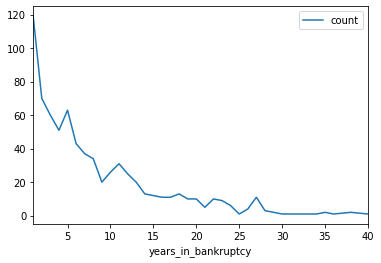

In [44]:
years_in_bankruptcy_count = requests.get(
    """
    https://phl.carto.com/api/v2/sql?q=SELECT years_in_bankruptcy, count(*) FROM real_estate_tax_delinquencies rttd 
    group by years_in_bankruptcy order by years_in_bankruptcy
    """
).json()["rows"]

zero_years_in_bankruptcy_count = requests.get(
    """
    https://phl.carto.com/api/v2/sql?q=SELECT count(*) FROM real_estate_tax_delinquencies rttd 
    where years_in_bankruptcy is null
    """
).json()["rows"][0]["count"]
pct_zero_years_bankruptcy = round(zero_years_in_bankruptcy_count / n_delinqs * 100, 2)
print(
    f"There are {zero_years_in_bankruptcy_count} ({pct_zero_years_bankruptcy}%) delinquencies not in bankruptcy."
)
years_in_bankruptcy_df = pd.DataFrame(years_in_bankruptcy_count)
years_in_bankruptcy_df.set_index("years_in_bankruptcy").sort_index().plot()

In [18]:
rttd = requests.get(
    """
    https://phl.carto.com/api/v2/sql?q=SELECT * FROM real_estate_tax_delinquencies rttd  limit 10
    """
).json()["rows"]
rttd[0]

{'cartodb_id': 1,
 'the_geom': '0101000020E610000053BE13F634D352C004AC1A4ECCEC4340',
 'the_geom_webmercator': '0101000020110F0000AD1FE467E8F95FC141205A98A17A5241',
 'objectid': 1415721,
 'opa_number': 41096100,
 'street_address': '00030 N 54TH ST',
 'zip_code': 19139,
 'zip_4': None,
 'unit_type': None,
 'unit_num': None,
 'owner': 'STABLE GENIUS LLC',
 'co_owner': 'STABLE GENIUS LLC',
 'principal_due': 162.52,
 'penalty_due': 6.09,
 'interest_due': 11.06,
 'other_charges_due': 17.92,
 'total_due': 197.59,
 'is_actionable': 'true',
 'payment_agreement': 'false',
 'num_years_owed': 2,
 'most_recent_year_owed': 2020,
 'oldest_year_owed': 2019,
 'most_recent_payment_date': '2020-03-17T00:00:00Z',
 'year_of_last_assessment': 2020,
 'total_assessment': 5400,
 'taxable_assessment': 5400,
 'mailing_address': '25 S 19TH ST FL 2',
 'mailing_city': 'PHILADELPHIA',
 'mailing_state': 'PA',
 'mailing_zip': '19103',
 'return_mail': 'false',
 'building_code': 'SR',
 'detail_building_description': 'VA

In [53]:
interest_due_result = requests.get(
    """
    https://phl.carto.com/api/v2/sql?q=SELECT round(interest_due) as interest_due, count(*) FROM real_estate_tax_delinquencies rttd 
    group by round(interest_due)
    """
).json()["rows"]
interest_due_df = pd.DataFrame(interest_due_result)

In [66]:
group_size = 5000

interest_due_df["interest_amount_due"] = pd.cut(
    interest_due_df["interest_due"],
    range(0, interest_due_df["interest_due"].max() + group_size, group_size),
    right=False,
)
interest_value_counts_series = interest_due_df.groupby("interest_amount_due").sum()[
    "count"
]
print("# of properties with interest due by $ amount")
interest_value_counts_series[interest_value_counts_series > 0].sort_index()

# of properties with interest due by $ amount


interest_amount_due
[0, 5000)           79989
[5000, 10000)        3975
[10000, 15000)       1467
[15000, 20000)        617
[20000, 25000)        301
[25000, 30000)        128
[30000, 35000)         69
[35000, 40000)         36
[40000, 45000)         25
[45000, 50000)          7
[50000, 55000)         10
[55000, 60000)          8
[60000, 65000)          8
[65000, 70000)          5
[70000, 75000)          4
[75000, 80000)          2
[80000, 85000)          1
[85000, 90000)          3
[90000, 95000)          1
[95000, 100000)         2
[100000, 105000)        2
[110000, 115000)        1
Name: count, dtype: int64